In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import re

In [2]:
matplotlib.rcParams.update({'font.size': 11})

In [3]:
def trend_plot(df, x, y):
    if x == 'l':
        d = df['Apex separation (mm)'].unique()
        n = np.shape(d)[0]
        fig, ax = plt.subplots(n, 1, figsize = (4, 3 * n))
        for i in range(n):
            df_process = df[df['Apex separation (mm)'] == d[i]]
            ax[i].plot(df_process['Flexure length (mm)'], df_process[y], 'r.')
            ax[i].set_xlabel('Flexure length (mm)')
            ax[i].set_ylabel(y)
            ax[i].set_title('D = {:.1f}'.format(d[i]))
    elif x == 'd':
        l = df['Flexure length (mm)'].unique()
        n = np.shape(l)[0]
        fig, ax = plt.subplots(n, 1, figsize = (4, 3 * n))
        for i in range(n):
            df_process = df[df['Flexure length (mm)'] == l[i]]
            ax[i].plot(df_process['Apex separation (mm)'], df_process[y], 'r.')
            ax[i].set_xlabel('Apex separation (mm)')
            ax[i].set_ylabel(y)
            ax[i].set_title('L = {:.1f}'.format(l[i]))
    plt.tight_layout()
    plt.show()

## First order bending

In [4]:
df1 = pd.read_csv(r'..\Final_data\First_order_bending\hourglass_filleted_first_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\First_order_bending\hourglass_filleted_first_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 3):
    new_column_name.append(','.join(column_name[i:i+3]))
df1.columns = new_column_name
df1 = df1.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df1.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df1.reset_index(drop = True, inplace = True)
df1

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1.3, d1=0.2, F1=1  \
0          0.0     0.0     0.0                       0.000000   
1          0.0     0.0     0.1                       0.000000   
2          0.0     0.0     0.2                       0.000000   
3          0.0     0.0     0.3                       0.000000   
4          0.0     0.0     0.4                       0.000000   
...        ...     ...     ...                            ...   
169735    41.3     4.0     0.5                      -1.484540   
169736    41.3     4.0     0.6                      -1.484503   
169737    41.3     4.0     0.7                      -1.484471   
169738    41.3     4.0     0.8                      -1.484445   
169739    41.3     4.0     0.9                      -1.484426   

        w (mm) @ L1=1.3, d1=0.3, F1=1  w (mm) @ L1=1.3, d1=0.4, F1=1  \
0                       -3.916326e-21                  -4.570864e-21   
1                        0.000000e+00                   0.000000e+00   
2                        0.000000e+00                   0.000000e+00   
3                        0.000000e+00                   0.000000e+00   
4                        0.000000e+00                   0.000000e+00   
...                               ...                            ...   
169735                  -1.516872e+00                  -1.549728e+00   
169736                  -1.516836e+00                  -1.549692e+00   
169737                  -1.516805e+00                  -1.549661e+00   
169738                  -1.516779e+00                  -1.549636e+00   
169739                  -1.516760e+00                  -1.549618e+00   

        w (mm) @ L1=1.3, d1=0.5, F1=1  w (mm) @ L1=1.3, d1=0.6, F1=1  \
0                        2.891458e-37                  -8.511318e-21   
1                        0.000000e+00                   0.000000e+00   
2                        0.000000e+00                   0.000000e+00   
3                        0.000000e+00                   0.000000e+00   
4                        0.000000e+00                   0.000000e+00   
...                               ...                            ...   
169735                  -1.583456e+00                  -1.618377e+00   
169736                  -1.583418e+00                  -1.618341e+00   
169737                  -1.583383e+00                  -1.618310e+00   
169738                  -1.583352e+00                  -1.618284e+00   
169739                  -1.583333e+00                  -1.618265e+00   

        w (mm) @ L1=1.3, d1=0.7, F1=1  w (mm) @ L1=1.3, d1=0.8, F1=1  ...  \
0                        2.075009e-20                       0.000000  ...   
1                        0.000000e+00                       0.000000  ...   
2                        0.000000e+00                       0.000000  ...   
3                        0.000000e+00                       0.000000  ...   
4                        0.000000e+00                       0.000000  ...   
...                               ...                            ...  ...   
169735                  -1.654985e+00                      -1.693814  ...   
169736                  -1.654949e+00                      -1.693778  ...   
169737                  -1.654918e+00                      -1.693747  ...   
169738                  -1.654891e+00                      -1.693721  ...   
169739                  -1.654873e+00                      -1.693702  ...   

        w (mm) @ L1=2.3, d1=1, F1=0.98  w (mm) @ L1=2.3, d1=1.1, F1=0.98  \
0                             0.000000                     -3.663533e-21   
1                             0.000000                      0.000000e+00   
2                             0.000000                      0.000000e+00   
3                             0.000000                      0.000000e+00   
4                             0.000000                      0.000000e+00   
...                                ...                               ...   
169735                       -2.239670  

In [5]:
df2 = pd.read_csv(r'..\Final_data\First_order_bending\hourglass_filleted_first_order_bending_stress_final.csv', skiprows = 4)
df2.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df2 = df2.round({'Flexure length (mm)': 1, 'Apex separation (mm)': 1, 'Applied force (N)': 2})
df2

Flexure length (mm)  Apex separation (mm)  Applied force (N)  \
0                    1.3                   0.2               1.00   
1                    1.3                   0.3               1.00   
2                    1.3                   0.4               1.00   
3                    1.3                   0.5               1.00   
4                    1.3                   0.6               1.00   
..                   ...                   ...                ...   
138                  2.3                   1.5               0.98   
139                  2.3                   1.6               0.98   
140                  2.3                   1.7               0.98   
141                  2.3                   1.8               0.98   
142                  2.3                   1.9               0.98   

     Max von Mises stress (N/m^2)  
0                    1.622487e+08  
1                    1.572915e+08  
2                    1.555843e+08  
3                    1.559940e+08  
4                    1.570524e+08  
..                            ...  
138                  1.599371e+08  
139                  1.619508e+08  
140                  1.650805e+08  
141                  1.689903e+08  
142                  1.725162e+08  

[143 rows x 4 columns]

<ipython-input-6-157c9dc4785e>:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


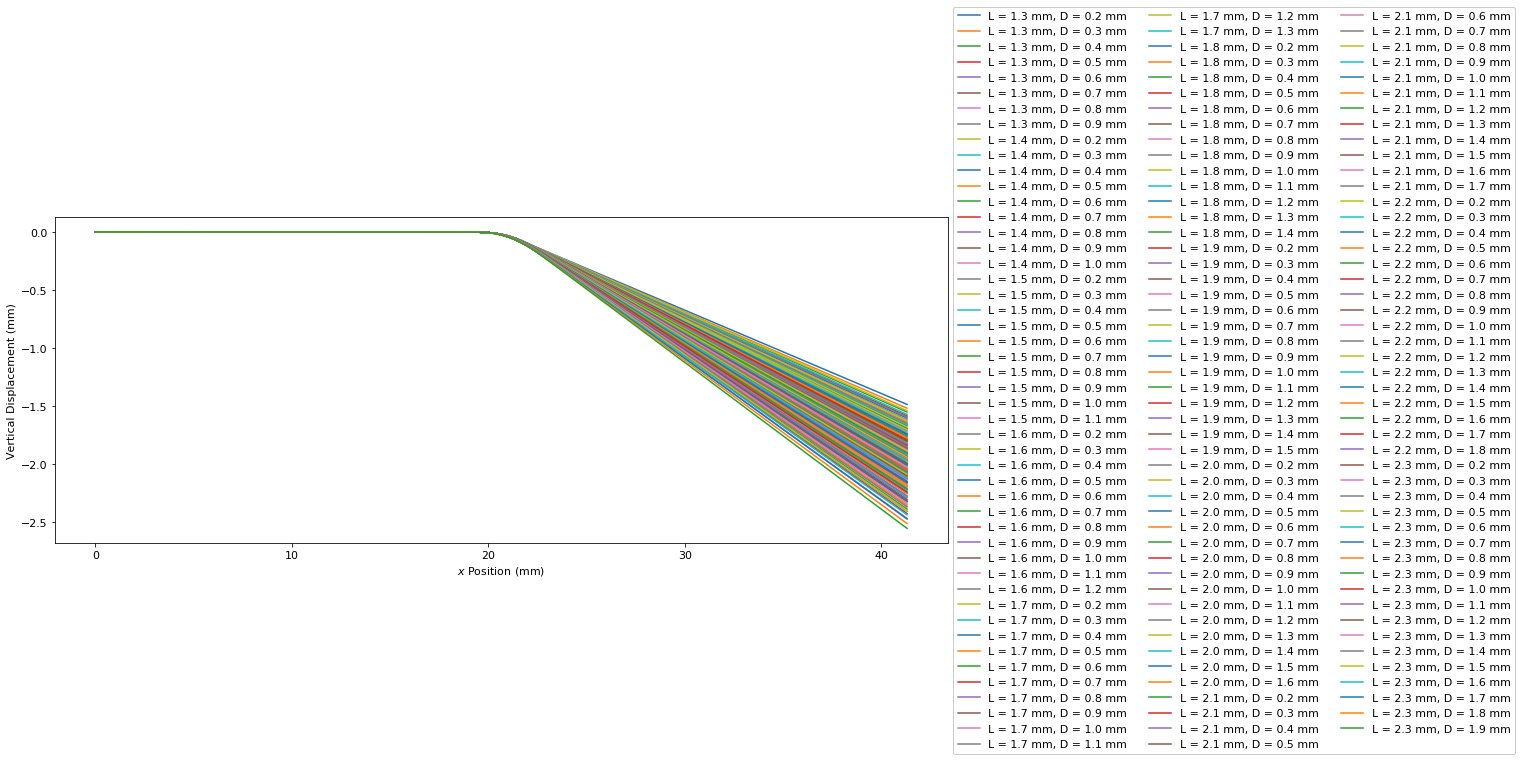

In [6]:
n = df1.shape[1] - 3
gradient = np.zeros(n)
pivot = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
for i in range(n):
    colname = df1.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d?)', colname)[0])
    d = float(re.findall(r'd1=(\d\.?\d?)', colname)[0])
    x_lim = 20.0 + l
    df_process = df1[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    coe = np.polyfit(df_process[df_process['X (mm)'] >= x_lim]['X (mm)'], df_process[df_process['X (mm)'] >= x_lim][colname], 1)
    gradient[i] = np.abs(coe[0])
    pivot[i] = -coe[1] / coe[0]
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm, D = {:.1f} mm'.format(l, d))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 3, framealpha = 1)

plt.tight_layout()
plt.show()

In [7]:
df2['X rotation pivot (mm)'] = pivot
df2['Torque (Nm)'] = df2['Applied force (N)'] * (df2['Flexure length (mm)'] + 40.0 - pivot) * 0.001
df2['Deflection angle (°)'] = np.arctan(gradient) * 180.0 / np.pi
df2['1st order stiffness (Nm/°)'] = df2['Torque (Nm)'] / df2['Deflection angle (°)']
df2['Normalised 1st order stress (N/m^2°)'] = df2['Max von Mises stress (N/m^2)'] / df2['Deflection angle (°)']
df2

Flexure length (mm)  Apex separation (mm)  Applied force (N)  \
0                    1.3                   0.2               1.00   
1                    1.3                   0.3               1.00   
2                    1.3                   0.4               1.00   
3                    1.3                   0.5               1.00   
4                    1.3                   0.6               1.00   
..                   ...                   ...                ...   
138                  2.3                   1.5               0.98   
139                  2.3                   1.6               0.98   
140                  2.3                   1.7               0.98   
141                  2.3                   1.8               0.98   
142                  2.3                   1.9               0.98   

     Max von Mises stress (N/m^2)  X rotation pivot (mm)  Torque (Nm)  \
0                    1.622487e+08              20.596717     0.020703   
1                    1.572915e+08              20.597674     0.020702   
2                    1.555843e+08              20.598570     0.020701   
3                    1.559940e+08              20.599397     0.020701   
4                    1.570524e+08              20.600163     0.020700   
..                            ...                    ...          ...   
138                  1.599371e+08              21.089306     0.020786   
139                  1.619508e+08              21.089427     0.020786   
140                  1.650805e+08              21.089471     0.020786   
141                  1.689903e+08              21.089416     0.020786   
142                  1.725162e+08              21.089250     0.020787   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                4.100045                    0.005050   
1                4.189261                    0.004942   
2                4.279884                    0.004837   
3                4.372843                    0.004734   
4                4.469124                    0.004632   
..                    ...                         ...   
138              6.770138                    0.003070   
139              6.867000                    0.003027   
140              6.968734                    0.002983   
141              7.076937                    0.002937   
142              7.193683                    0.002890   

     Normalised 1st order stress (N/m^2°)  
0                            3.957242e+07  
1                            3.754637e+07  
2                            3.635246e+07  
3                            3.567336e+07  
4                            3.514166e+07  
..                                    ...  
138                          2.362390e+07  
139                          2.358392e+07  
140                          2.368874e+07  
141                          2.387901e+07  
142                          2.398163e+07  

[143 rows x 9 columns]

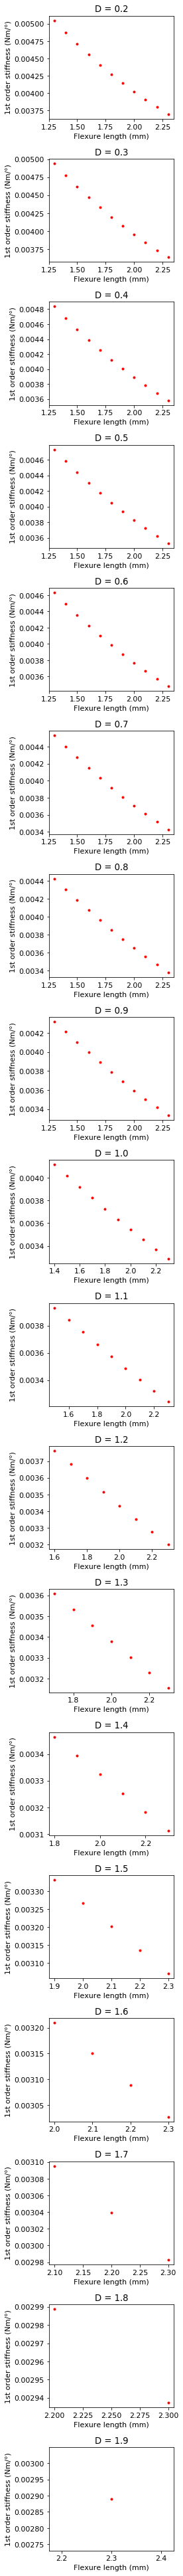

In [8]:
trend_plot(df2, 'l', '1st order stiffness (Nm/°)')

## Second order bending

In [9]:
df3 = pd.read_csv(r'..\Final_data\Second_order_bending\hourglass_filleted_second_order_bending_displacement_final.csv', header = None, skiprows = 9)
column_name = pd.read_csv(r'..\Final_data\Second_order_bending\hourglass_filleted_second_order_bending_displacement_final.csv', header = None, nrows = 1, skiprows = 8)
column_name = np.squeeze(column_name.values)
new_column_name = ['X (mm)', 'Y (mm)', 'Z (mm)']
for i in range(3, np.shape(column_name)[0], 2):
    new_column_name.append(','.join(column_name[i:i+2]))
df3.columns = new_column_name
df3 = df3.round({'X (mm)': 1, 'Y (mm)': 1, 'Z (mm)': 1})
df3.sort_values(by = ['X (mm)', 'Y (mm)', 'Z (mm)'], inplace = True)
df3.reset_index(drop = True, inplace = True)
df3

X (mm)  Y (mm)  Z (mm)  w (mm) @ L1=1.3, d1=0.2  \
0          0.0     0.0     0.0             6.330592e-36   
1          0.0     0.0     0.1             0.000000e+00   
2          0.0     0.0     0.2             0.000000e+00   
3          0.0     0.0     0.3             0.000000e+00   
4          0.0     0.0     0.4             0.000000e+00   
...        ...     ...     ...                      ...   
169735    41.3     4.0     0.5            -1.521188e-01   
169736    41.3     4.0     0.6            -1.511977e-01   
169737    41.3     4.0     0.7            -1.504078e-01   
169738    41.3     4.0     0.8            -1.497491e-01   
169739    41.3     4.0     0.9            -1.492979e-01   

        w (mm) @ L1=1.3, d1=0.3  w (mm) @ L1=1.3, d1=0.4  \
0                      0.000000            -1.545864e-19   
1                      0.000000             0.000000e+00   
2                      0.000000             0.000000e+00   
3                      0.000000             0.000000e+00   
4                      0.000000             0.000000e+00   
...                         ...                      ...   
169735                -0.152707            -1.537351e-01   
169736                -0.151759            -1.527179e-01   
169737                -0.150963            -1.518195e-01   
169738                -0.150320            -1.510398e-01   
169739                -0.149867            -1.505908e-01   

        w (mm) @ L1=1.3, d1=0.5  w (mm) @ L1=1.3, d1=0.6  \
0                      0.000000            -2.672088e-20   
1                      0.000000             0.000000e+00   
2                      0.000000             0.000000e+00   
3                      0.000000             0.000000e+00   
4                      0.000000             0.000000e+00   
...                         ...                      ...   
169735                -0.154075            -1.550329e-01   
169736                -0.153172            -1.541178e-01   
169737                -0.152434            -1.533667e-01   
169738                -0.151861            -1.527796e-01   
169739                -0.151389            -1.523390e-01   

        w (mm) @ L1=1.3, d1=0.7  w (mm) @ L1=1.3, d1=0.8  ...  \
0                  7.780732e-20                 0.000000  ...   
1                  0.000000e+00                 0.000000  ...   
2                  0.000000e+00                 0.000000  ...   
3                  0.000000e+00                 0.000000  ...   
4                  0.000000e+00                 0.000000  ...   
...                         ...                      ...  ...   
169735            -1.562740e-01                -0.157772  ...   
169736            -1.553796e-01                -0.156866  ...   
169737            -1.546530e-01                -0.156126  ...   
169738            -1.540942e-01                -0.155552  ...   
169739            -1.536369e-01                -0.155086  ...   

        w (mm) @ L1=2.3, d1=1  w (mm) @ L1=2.3, d1=1.1  \
0               -7.537209e-20             7.551156e-20   
1                0.000000e+00             0.000000e+00   
2                0.000000e+00             0.000000e+00   
3                0.000000e+00             0.000000e+00   
4                0.000000e+00             0.000000e+00   
...                       ...                      ...   
169735          -2.566935e-01            -2.585418e-01   
169736          -2.567210e-01            -2.585698e-01   
169737          -2.567191e-01            -2.585653e-01   
169738          -2.567061e-01            -2.585486e-01   
169739          -2.566819e-01            -2.585198e-01   

        w (mm) @ L1=2.3, d1=1.2  w (mm) @ L1=2.3, d1=1.3  \
0                      0.000000             4.093685e-20   
1                      0.000000             0.000000e+00   
2                      0.000000             0.000000e+00   
3                      0.000000             0.000000e+00   
4                      0.000000             0.000000e+00   
...                

In [10]:
df4 = pd.read_csv(r'..\Final_data\Second_order_bending\hourglass_filleted_second_order_bending_stress_final.csv', skiprows = 4)
df4.rename(columns = {'% Flexure length (mm)': 'Flexure length (mm)'}, inplace = True)
df4['Applied force (N)'] = np.full(df4.shape[0], 35.0).round(1)
df4 = df4.round({'Flexure length (mm)': 1, 'Apex separation (mm)': 1, 'Applied force (N)': 1})
df4

Flexure length (mm)  Apex separation (mm)  Max von Mises stress (N/m^2)  \
0                    1.3                   0.2                  2.001390e+08   
1                    1.3                   0.3                  1.991643e+08   
2                    1.3                   0.4                  1.984320e+08   
3                    1.3                   0.5                  1.958771e+08   
4                    1.3                   0.6                  1.954567e+08   
..                   ...                   ...                           ...   
138                  2.3                   1.5                  2.913510e+08   
139                  2.3                   1.6                  2.857771e+08   
140                  2.3                   1.7                  2.881703e+08   
141                  2.3                   1.8                  3.031574e+08   
142                  2.3                   1.9                  3.145683e+08   

     Applied force (N)  
0                 35.0  
1                 35.0  
2                 35.0  
3                 35.0  
4                 35.0  
..                 ...  
138               35.0  
139               35.0  
140               35.0  
141               35.0  
142               35.0  

[143 rows x 4 columns]

<ipython-input-11-16b5e13a7282>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


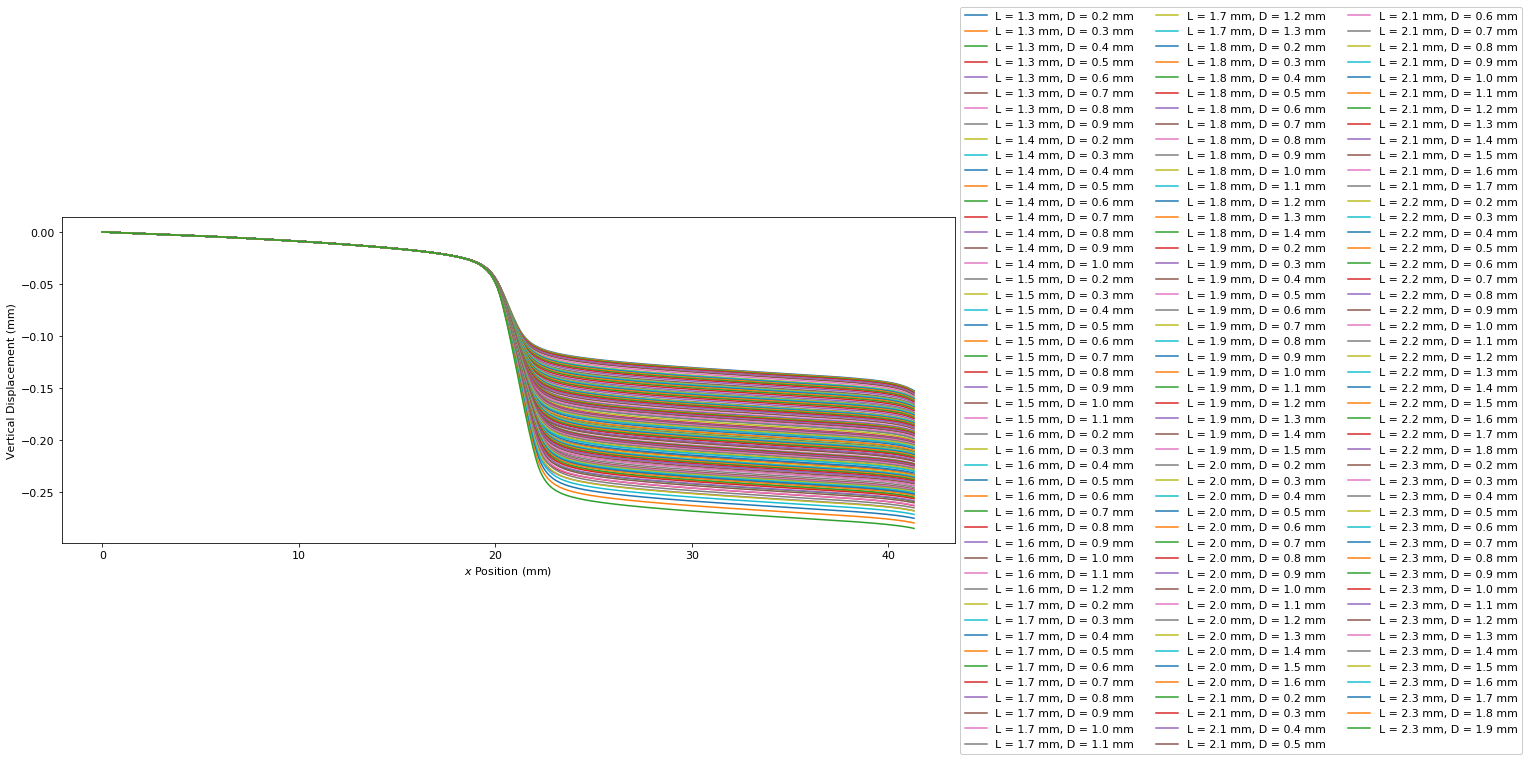

In [11]:
n = df3.shape[1] - 3
displacement = np.zeros(n)

fig, ax = plt.subplots(1, 1, figsize = (16, 6))
for i in range(n):
    colname = df3.columns[i+3]
    l = float(re.findall(r'L1=(\d\.?\d?)', colname)[0])
    d = float(re.findall(r'd1=(\d\.?\d?)', colname)[0])
    x_lim = math.ceil(10.0 * (20.0 + l)) / 10.0
    df_process = df3[['X (mm)', 'Y (mm)', 'Z (mm)', colname]].copy()
    df_process = df_process[df_process['Z (mm)'] <= 0.8]
    df_process = df_process.drop(columns = ['Y (mm)', 'Z (mm)'])
    df_process = df_process.groupby(['X (mm)']).mean()
    df_process.reset_index(inplace = True)
    displacement[i] = (df_process[df_process['X (mm)'] == 20.0][colname].values[0] - df_process[df_process['X (mm)'] == x_lim][colname].values[0]) * 0.001
    ax.plot(df_process['X (mm)'], df_process[colname], '-', label = 'L = {:.1f} mm, D = {:.1f} mm'.format(l, d))

ax.set_xlabel(r'$x$ Position (mm)')
ax.set_ylabel('Vertical Displacement (mm)')

ax.legend(loc = 'center left', bbox_to_anchor = (1, 0.5), ncol = 3, framealpha = 1)

plt.tight_layout()
plt.show()

In [12]:
df4['Displacement (m)'] = displacement
df4['2nd order stiffness (N/m)'] = df4['Applied force (N)'] / df4['Displacement (m)']
df4['Normalised 2nd order stress (N/m^3)'] = df4['Max von Mises stress (N/m^2)'] / df4['Displacement (m)']
df4

Flexure length (mm)  Apex separation (mm)  Max von Mises stress (N/m^2)  \
0                    1.3                   0.2                  2.001390e+08   
1                    1.3                   0.3                  1.991643e+08   
2                    1.3                   0.4                  1.984320e+08   
3                    1.3                   0.5                  1.958771e+08   
4                    1.3                   0.6                  1.954567e+08   
..                   ...                   ...                           ...   
138                  2.3                   1.5                  2.913510e+08   
139                  2.3                   1.6                  2.857771e+08   
140                  2.3                   1.7                  2.881703e+08   
141                  2.3                   1.8                  3.031574e+08   
142                  2.3                   1.9                  3.145683e+08   

     Applied force (N)  Displacement (m)  2nd order stiffness (N/m)  \
0                 35.0          0.000052              678952.281519   
1                 35.0          0.000052              671733.230948   
2                 35.0          0.000053              663281.803864   
3                 35.0          0.000054              653414.051615   
4                 35.0          0.000055              641921.344200   
..                 ...               ...                        ...   
138               35.0          0.000166              211124.411068   
139               35.0          0.000169              207051.783039   
140               35.0          0.000173              202601.888059   
141               35.0          0.000177              197715.506301   
142               35.0          0.000182              192327.302058   

     Normalised 2nd order stress (N/m^3)  
0                           3.882423e+12  
1                           3.822436e+12  
2                           3.760467e+12  
3                           3.656824e+12  
4                           3.584795e+12  
..                                   ...  
138                         1.757466e+12  
139                         1.690590e+12  
140                         1.668110e+12  
141                         1.712541e+12  
142                         1.728574e+12  

[143 rows x 7 columns]

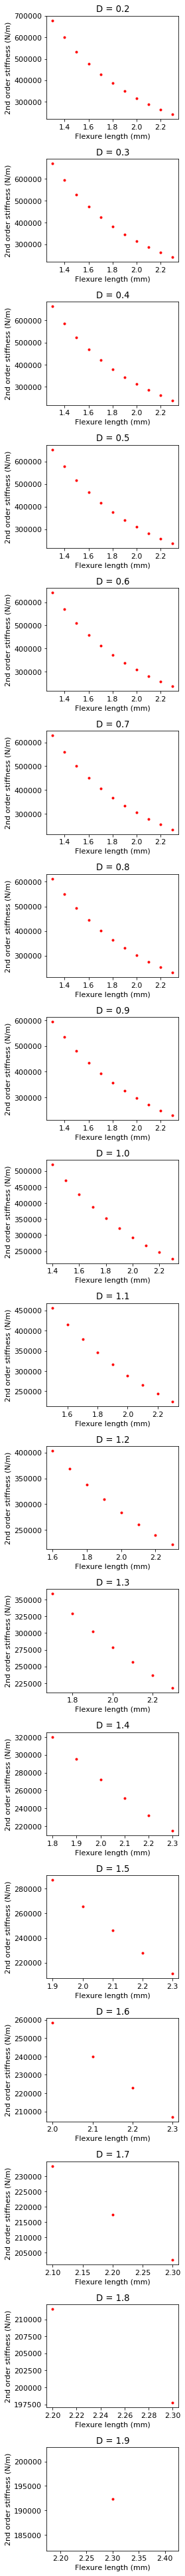

In [13]:
trend_plot(df4, 'l', '2nd order stiffness (N/m)')

## Performance characterisation

In [14]:
df5 = df2[['Flexure length (mm)', 'Apex separation (mm)', 'X rotation pivot (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df5['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df5['Displacement (m)'] = df4['Displacement (m)']
df5['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df5['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df5

Flexure length (mm)  Apex separation (mm)  X rotation pivot (mm)  \
0                    1.3                   0.2              20.596717   
1                    1.3                   0.3              20.597674   
2                    1.3                   0.4              20.598570   
3                    1.3                   0.5              20.599397   
4                    1.3                   0.6              20.600163   
..                   ...                   ...                    ...   
138                  2.3                   1.5              21.089306   
139                  2.3                   1.6              21.089427   
140                  2.3                   1.7              21.089471   
141                  2.3                   1.8              21.089416   
142                  2.3                   1.9              21.089250   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                4.100045                    0.005050   
1                4.189261                    0.004942   
2                4.279884                    0.004837   
3                4.372843                    0.004734   
4                4.469124                    0.004632   
..                    ...                         ...   
138              6.770138                    0.003070   
139              6.867000                    0.003027   
140              6.968734                    0.002983   
141              7.076937                    0.002937   
142              7.193683                    0.002890   

     Normalised 1st order stress (N/m^2°)  1st order max stress (N/m^2)  \
0                            3.957242e+07                  1.622487e+08   
1                            3.754637e+07                  1.572915e+08   
2                            3.635246e+07                  1.555843e+08   
3                            3.567336e+07                  1.559940e+08   
4                            3.514166e+07                  1.570524e+08   
..                                    ...                           ...   
138                          2.362390e+07                  1.599371e+08   
139                          2.358392e+07                  1.619508e+08   
140                          2.368874e+07                  1.650805e+08   
141                          2.387901e+07                  1.689903e+08   
142                          2.398163e+07                  1.725162e+08   

     Displacement (m)  2nd order stiffness (N/m)  2nd order max stress (N/m^2)  
0            0.000052              678952.281519                  2.001390e+08  
1            0.000052              671733.230948                  1.991643e+08  
2            0.000053              663281.803864                  1.984320e+08  
3            0.000054              653414.051615                  1.958771e+08  
4            0.000055              641921.344200                  1.954567e+08  
..                ...                        ...                           ...  
138          0.000166              211124.411068                  2.913510e+08  
139          0.000169              207051.783039                  2.857771e+08  
140          0.000173              202601.888059                  2.881703e+08  
141          0.000177              197715.506301                  3.031574e+08  
142          0.000182              192327.302058                  3.145683e+08  

[143 rows x 10 columns]

In [15]:
df5['Parameter1'] = df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']
df5['Parameter2'] = df5['1st order max stress (N/m^2)'] / (df5['1st order stiffness (Nm/°)'] * df5['Deflection angle (°)'])
df5['Parameter3'] = df5['2nd order max stress (N/m^2)'] / (df5['2nd order stiffness (N/m)'] * df5['Displacement (m)'])
df5['Dimensionless'] = (df5['2nd order stiffness (N/m)'] / df5['1st order stiffness (Nm/°)']) * ((40.0 + df5['Flexure length (mm)'] - df5['X rotation pivot (mm)']) * 0.001)**2
df5

Flexure length (mm)  Apex separation (mm)  X rotation pivot (mm)  \
0                    1.3                   0.2              20.596717   
1                    1.3                   0.3              20.597674   
2                    1.3                   0.4              20.598570   
3                    1.3                   0.5              20.599397   
4                    1.3                   0.6              20.600163   
..                   ...                   ...                    ...   
138                  2.3                   1.5              21.089306   
139                  2.3                   1.6              21.089427   
140                  2.3                   1.7              21.089471   
141                  2.3                   1.8              21.089416   
142                  2.3                   1.9              21.089250   

     Deflection angle (°)  1st order stiffness (Nm/°)  \
0                4.100045                    0.005050   
1                4.189261                    0.004942   
2                4.279884                    0.004837   
3                4.372843                    0.004734   
4                4.469124                    0.004632   
..                    ...                         ...   
138              6.770138                    0.003070   
139              6.867000                    0.003027   
140              6.968734                    0.002983   
141              7.076937                    0.002937   
142              7.193683                    0.002890   

     Normalised 1st order stress (N/m^2°)  1st order max stress (N/m^2)  \
0                            3.957242e+07                  1.622487e+08   
1                            3.754637e+07                  1.572915e+08   
2                            3.635246e+07                  1.555843e+08   
3                            3.567336e+07                  1.559940e+08   
4                            3.514166e+07                  1.570524e+08   
..                                    ...                           ...   
138                          2.362390e+07                  1.599371e+08   
139                          2.358392e+07                  1.619508e+08   
140                          2.368874e+07                  1.650805e+08   
141                          2.387901e+07                  1.689903e+08   
142                          2.398163e+07                  1.725162e+08   

     Displacement (m)  2nd order stiffness (N/m)  \
0            0.000052              678952.281519   
1            0.000052              671733.230948   
2            0.000053              663281.803864   
3            0.000054              653414.051615   
4            0.000055              641921.344200   
..                ...                        ...   
138          0.000166              211124.411068   
139          0.000169              207051.783039   
140          0.000173              202601.888059   
141          0.000177              197715.506301   
142          0.000182              192327.302058   

     2nd order max stress (N/m^2)    Parameter1    Parameter2    Parameter3  \
0                    2.001390e+08  1.344586e+08  7.836859e+09  5.718256e+06   
1                    1.991643e+08  1.359299e+08  7.597771e+09  5.690408e+06   
2                    1.984320e+08  1.371291e+08  7.515631e+09  5.669486e+06   
3                    1.958771e+08  1.380287e+08  7.535724e+09  5.596488e+06   
4                    1.954567e+08  1.385917e+08  7.587133e+09  5.584477e+06   
..                            ...           ...           ...           ...   
138                  2.913510e+08  6.876303e+07  7.694284e+09  8.324314e+06   
139                  2.857771e+08  6.840181e+07  7.791204e+09  8.165060e+06   
140                  2.881703e+08  6.792346e+07  7.941787e+09  8.233437e+06   
141                  3.031574e+08  6.731430e+07  8.129859e+09  8.661640e+06   
142                  3.145683e+08  6.655951e+07 

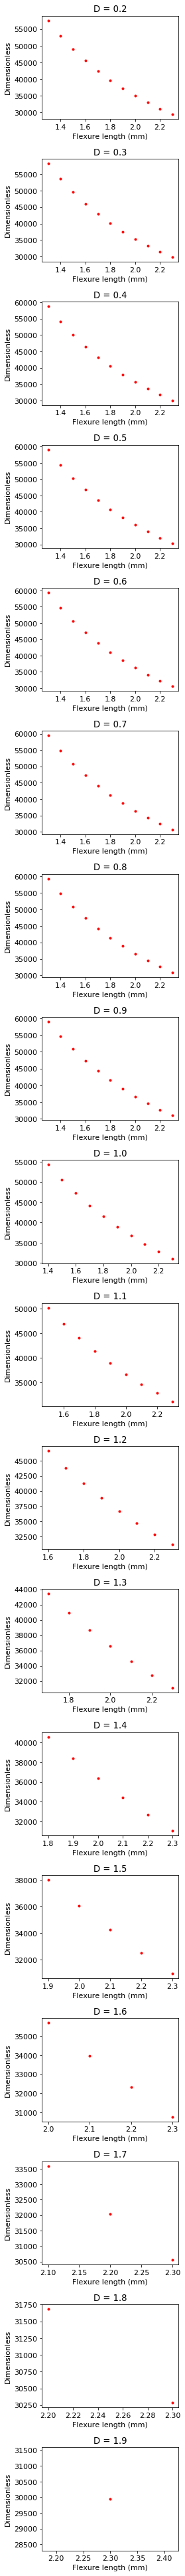

In [16]:
trend_plot(df5, 'l', 'Dimensionless')

In [17]:
def format_data(df, header):
    l = df['Flexure length (mm)'].unique()
    d = df['Apex separation (mm)'].unique()
    ln = np.shape(l)[0]
    dn = np.shape(d)[0]
    z = np.empty((dn, ln))
    z[:] = np.nan
    for i in range(dn):
        process = df[df['Apex separation (mm)'] == d[i]][header].values
        pn = np.shape(process)[0]
        for j in range(pn):
            z[i, j + (ln - pn)] = process[j]
    return z

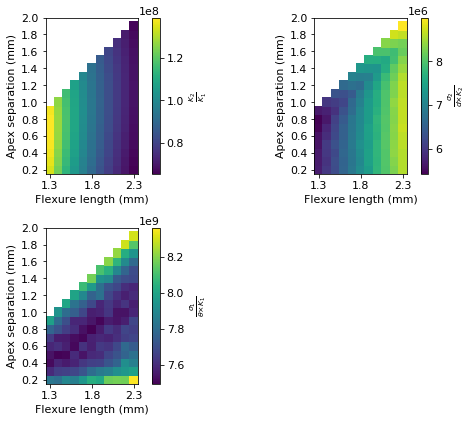

In [18]:
l = df5['Flexure length (mm)'].unique()
ln = np.shape(l)[0]
l = np.append(l, [l[-1] + (l[1] - l[0])]) - ((l[1] - l[0]) / 2.0)
d = df5['Apex separation (mm)'].unique()
dn = np.shape(d)[0]
d = np.append(d, [d[-1] + (d[1] - d[0])]) - ((d[1] - d[0]) / 2.0)

fig, ax = plt.subplots(2, 2, figsize = (8, 6))
ax[1, 1].remove()

ax[0, 0].set_xlabel('Flexure length (mm)')
ax[0, 0].set_ylabel('Apex separation (mm)')
ax[1, 0].set_xlabel('Flexure length (mm)')
ax[1, 0].set_ylabel('Apex separation (mm)')
ax[0, 1].set_xlabel('Flexure length (mm)')
ax[0, 1].set_ylabel('Apex separation (mm)')

z = format_data(df5, 'Parameter1')
graph = ax[0, 0].pcolormesh(l, d, z, vmin = df5['Parameter1'].min(), vmax = df5['Parameter1'].max())
cbar = plt.colorbar(graph, ax = ax[0, 0])
cbar.ax.set_ylabel(r'$\frac{K_2}{K_1}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = format_data(df5, 'Parameter2')
graph = ax[1, 0].pcolormesh(l, d, z, vmin = df5['Parameter2'].min(), vmax = df5['Parameter2'].max())
cbar = plt.colorbar(graph, ax = ax[1, 0])
cbar.ax.set_ylabel(r'$\frac{\sigma_1}{{\theta}{\times}{K_1}}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))
z = format_data(df5, 'Parameter3')
graph = ax[0, 1].pcolormesh(l, d, z, vmin = df5['Parameter3'].min(), vmax = df5['Parameter3'].max())
cbar = plt.colorbar(graph, ax = ax[0, 1])
cbar.ax.set_ylabel(r'$\frac{\sigma_2}{{d}{\times}{K_2}}$')
cbar.ax.ticklabel_format(scilimits = (0, 0))

ax[0, 0].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[0, 0].set_yticks(np.arange(df5['Apex separation (mm)'].min(), df5['Apex separation (mm)'].max() + 0.2, 0.2))
ax[1, 0].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[1, 0].set_yticks(np.arange(df5['Apex separation (mm)'].min(), df5['Apex separation (mm)'].max() + 0.2, 0.2))
ax[0, 1].set_xticks(np.arange(df5['Flexure length (mm)'].min(), df5['Flexure length (mm)'].max() + 0.5, 0.5))
ax[0, 1].set_yticks(np.arange(df5['Apex separation (mm)'].min(), df5['Apex separation (mm)'].max() + 0.2, 0.2))

ax[0, 0].set_aspect(1)
ax[1, 0].set_aspect(1)
ax[0, 1].set_aspect(1)

plt.tight_layout()
plt.subplots_adjust(wspace = 0)
plt.show()

In [19]:
df6 = df2[['Flexure length (mm)', 'Apex separation (mm)', 'Deflection angle (°)', '1st order stiffness (Nm/°)', 'Normalised 1st order stress (N/m^2°)']].copy()
df6['1st order max stress (N/m^2)'] = df2['Max von Mises stress (N/m^2)']
df6['2nd order stiffness (N/m)'] = df4['2nd order stiffness (N/m)']
df6['2nd order max stress (N/m^2)'] = df4['Max von Mises stress (N/m^2)']
df6['Stiffness ratio'] = df5['Dimensionless']
df6.to_csv('hourglass_final.csv', index = False)